# Ejemplos y ejercicios de aplicaciones de programación lineal

## Programación para Análisis de Datos 

### Mtra. Gisel Hernández Chávez



### Contenido

+ ¿Qué es la programación lineal?
+ Ejemplos
+ Ejercicios


In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
import pandas as pd

In [83]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## ¿Qué es la programación lineal?

https://realpython.com/linear-programming-python/

La __programación lineal__ es un conjunto de técnicas utilizadas en programación matemática, a veces llamada optimización matemática, para resolver sistemas de ecuaciones y desigualdades lineales mientras se maximiza o minimiza alguna función lineal. 

La __programación lineal de enteros mixta__ es una extensión de la programación lineal. Maneja problemas en los que al menos una variable toma un número entero discreto en lugar de un valor continuo. Aunque a primera vista los problemas de enteros mixtos parecen similares a los problemas de variables continuas, ofrecen ventajas significativas en términos de flexibilidad y precisión.

Las variables enteras son importantes para representar adecuadamente cantidades expresadas naturalmente con números enteros, como la cantidad de casas a construir o la cantidad de clientes atendidos en una gasolinera.

Un tipo particularmente importante de variable entera es la variable binaria. Sólo puede tomar los valores cero o uno y es útil para tomar decisiones de sí o no, como por ejemplo si se debe construir o no una planta o si se debe encender o apagar una máquina. También puede uarse para representar restricciones lógicas.

El método básico para resolver problemas de programación lineal se denomina método simplex, que tiene varias variantes. Otro enfoque popular es el método del punto interior.

Los problemas de programación lineal entera mixta se resuelven con métodos más complejos y computacionalmente intensivos, como el método de ramificación y unión (branch and bound) que internamente utiliza programación lineal. 


### Pasos para la Programación lineal

1. Definir variables
2. Definir función objetivo
3. Definir restricciones. Limita el conjunto de soluciones factibles.
4. Calcular coordenadas de los vértices de las soluciones factibles. La solución óptima, si es única, se encuentra en un vértice. 


### Ejemplo
Tomado de https://www.superprof.es/apuntes/escolar/matematicas/algebralineal/pl/ejercicios-y-problemas-resueltos-de-programacion-lineal.html

Una compañía fabrica y vende dos modelos de lámparas L1 y L2. Para su fabricación se necesita un __trabajo manual__ de 20 minutos para el modelo L1 y de 30 minutos para el L2; y un trabajo de máquina de 20 minutos para el modelo L1 y de 10 minutos para L2.

Se dispone para el trabajo manual de 100 horas al mes y para la máquina 80 horas al mes. Sabiendo que el beneficio por unidad es de 15 y 10 euros para L1 y L2,  respectivamente, planificar la producción para obtener el máximo beneficio.

### Solución para el ejemplo

+ Variables

x1: cantidad de lámparas L1

x2: cantidad de lámparas L2

+ Función objetivo

maximizar f(x1,x2) = 15*x1 + 10*x2

+ Restricciones

20*x1 + 30*x2 <= 100*60 # en minutos

20*x1 + 10*x2 <= 80*60  # en minutos

x1 >= 0  # entero positivo (número natural)

x2 >= 0  


In [84]:
# Representar gráficamente las inecuaciones de las restricciones

#en la 1ra inecuación
x12 = 6000 / 30  # x1 = 0  coordenada x1,x2 = (0,200)
x11 = 6000 / 20  # x2 = 0  coordenada x1,x2 = (300,0)

#en la 2da inecuación
x21 = 4800 / 20  # x2 = 0  coordenada x1,x2 = (240,0)
x22 = 4800 / 10  # x1 = 0  coordenada x1,x2 = (0,480)


In [85]:
# Para calcular la intersección se igualan las ecuaciones

#20*x1 + 30*x2 - 6000 = 20*x1 + 10*x2 - 4800
#20*x2 = 1200
ix2 = 60 # x2 de la coord. de la intersección

# sustituyendo x2 en una ecuación para determinar x1
#20*x1 + 30*60 = 6000
ix1 = (6000 - 1800) / 20 # x1 de la coord. de la intersección
ix1,ix2

(210.0, 60)

In [86]:
# Forma simplificada usando sympy

from sympy import Point, Line 
  
p1, p2, p3, p4 = Point(0,x12), Point(x11,0), Point(0,x22), Point(x21,0) 
l1 = Line(p1, p2) # puntos de la primera línea
l2 = Line(p3,p4)   # puntos de la segunda línea
# using intersection() method 
showIntersection = l1.intersection(l2) 
  
print('coordenada de la intersección: ', showIntersection) 

coordenada de la intersección:  [Point2D(210, 60)]


In [87]:
# usando sistemas de ecuaciones
from sympy import solve
from sympy.abc import x, y, z
solve([20*x + 30*y - 6000, 20*x + 10*y-4800], [x, y], dict=True, set=True)

[{x: 210, y: 60}]

In [88]:
# Función objetivo en todos los vértices
def fun_obj(x,y):
    return 15*x + 10*y

In [89]:
# Calcular función objetivo en todos los vértices y determinar máximo
vertices = [(0,x12), (ix1,ix2), (x21,0)]
beneficios = [fun_obj(i[0],i[1]) for i in vertices]
beneficios = np.array(beneficios)
ind_maximo = np.argmax(beneficios)
f' El máximo beneficio es de {max(beneficios)} con vértice de índice {ind_maximo} en {vertices[ind_maximo]}'

' El máximo beneficio es de 3750.0 con vértice de índice 1 en (210.0, 60)'

In [90]:
vertices = np.array(vertices)
vertices

array([[  0., 200.],
       [210.,  60.],
       [240.,   0.]])

In [91]:
vertices.shape

(3, 2)

In [92]:
vertices[:,0]  # las x1
vertices[:,1]  # las x2

array([  0., 210., 240.])

array([200.,  60.,   0.])

In [93]:
sx1 = pd. Series(vertices[:,0])
sx2 = pd. Series(vertices[:,1])

(0.0, 500.0)

(0.0, 500.0)

Text(0.5, 0, 'cantidad de lámparas L1')

Text(0, 0.5, 'cantidad de lámparas L2')

Text(0, 200.0, '(0, 200.0)')

Text(300.0, 0, '(300.0, 0)')

Text(0, 480.0, '(0, 480.0)')

Text(240.0, 0, '(240.0, 0)')

Text(210.0, 60, '(210.0, 60)')

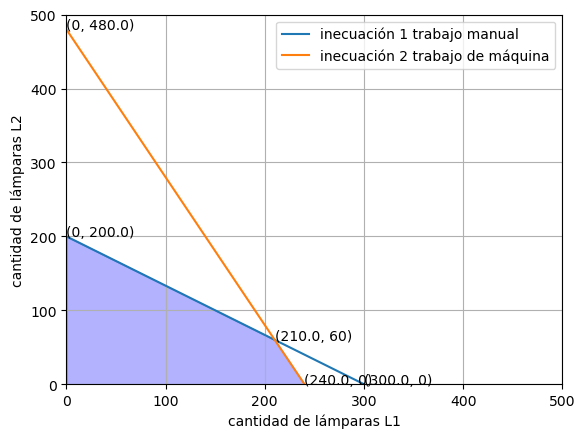

In [94]:

fig,ax = plt.subplots()
plt.xlim(0,500)
plt.ylim(0,500)
plt.grid()
plt.xlabel('cantidad de lámparas L1')
plt.ylabel('cantidad de lámparas L2')
plt.plot(np.array([0,x11]),np.array([x12,0]), label='inecuación 1 trabajo manual')
plt.plot(np.array([0,x21]),np.array([x22,0]), label='inecuación 2 trabajo de máquina')

ax.annotate(f'{(0,x12)}', xy=(0,x12))
ax.annotate(f'{(x11,0)}', xy=(x11,0))
ax.annotate(f'{(0,x22)}', xy=(0,x22))
ax.annotate(f'{(x21,0)}', xy=(x21,0))
ax.annotate(f'{(ix1,ix2)}', xy=(ix1,ix2))  # intersección

# colorear área bajo el polígono de restricciones
data = pd. Series(sx2,index=sx1)
#data.plot(kind='area',color='gray')
#plt.plot()
plt.fill_between(sx1, sx2, color='blue', alpha=0.3)
plt.legend()
plt.show()

## Solución usando el método simplex de programación lineal

https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html

+ La __función linprog__ minimiza. Si lo que se requiere es maximizar, basta con minimizar la negativa de la función, lo que es equivalente.
+ __linprog_ Retorna un un objeto scipy.optimize.OptimizeResult que consta de los campos:

    __x1-D array__
    The values of the decision variables that minimizes the objective function while satisfying the constraints.

    __funfloat__
    The optimal value of the objective function c @ x.

    __slack1-D array__
    The (nominally positive) values of the slack variables, b_ub - A_ub @ x.

    __con1-D array__
    The (nominally zero) residuals of the equality constraints, b_eq - A_eq @ x.

    __successbool__
    True when the algorithm succeeds in finding an optimal solution.

    __statusint__
    An integer representing the exit status of the algorithm.

    0 : Optimization terminated successfully.

    1 : Iteration limit reached.

    2 : Problem appears to be infeasible.

    3 : Problem appears to be unbounded.

    4 : Numerical difficulties encountered.

    __messagestr__
    A string descriptor of the exit status of the algorithm.

    __nitint__
    The total number of iterations performed in all phases.

### Para el problema de ejemplo

+ Variables

    x1: cantidad de lámparas L1

    x2: cantidad de lámparas L2

+ Función objetivo

    minimizar -(15*x1 + 10*x2)

+ Restricciones

    20*x1 + 30*x2 <= 100*60 # en minutos

    20*x1 + 10*x2 <= 80*60  # en minutos

    x1 >= 0  # entero positivo (número natural)

    x2 >= 0  


In [95]:
from scipy.optimize import linprog


In [96]:
# Ejemplo de la documentación de scipy
# Note que se definen como listas
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
res.fun
res.x
res.message

-22.0

array([10., -3.])

'Optimization terminated successfully. (HiGHS Status 7: Optimal)'

### Para el ejemplo de estudio

In [97]:
# coeficientes de la función a minimizar
c = [-15,-10]

In [98]:
#Matriz de restricciones de desigualdad 
#Cada fila de A_ub especifica los coeficientes de una restricción de desigualdad lineal en x
A_ub = [[20,30],[20,10]]

In [99]:
# Vector de restricción de desigualdad
# Cada elemento representa un límite superior del correspondiente valor de A_ub @ x
b_ub =[6000,4800]

In [100]:
#Matriz de restricciones de igualdad
# Cada fila de A_eq especifica los coeficientes de una restricción de igualdad lineal en x
#A_eq 

In [101]:
# Vector de restricción de igualdad
# Cada elemento de A_eq @ x tiene que ser igual al correspondiente elemento de b_eq
#b_eq

In [102]:
# Una secuencia de pares (mínimo, máximo) para cada elemento en x. Define los valores mín y máx de esa variable de decisión
# None para indicar que no hay ningún límite
# De forma predeterminada, los límites son (0, None) (todas las variables de decisión no son negativas)
# Si se proporciona una única tupla (min, max), entonces servirán como límites para todas las variables de decisión

# Usaremos el predeterminado para este caso

In [103]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub)
res.fun
res.x
res.message

-3750.0

array([210.,  60.])

'Optimization terminated successfully. (HiGHS Status 7: Optimal)'

## Ejercicio

En una granja de pollos se da una dieta de engorde con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentran dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [104]:
# coeficientes de la función a minimizar
c = [10,30]

In [105]:
#Matriz de restricciones de desigualdad 
#Cada fila de A_ub especifica los coeficientes de una restricción de desigualdad lineal en x
A_ub = [[-1,-5],[-5,-1]]

In [106]:
# Vector de restricción de desigualdad
# Cada elemento representa un límite superior del correspondiente valor de A_ub @ x
b_ub =[-15,-15]

In [107]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub)
res.fun
res.x
res.message

100.0

array([2.5, 2.5])

'Optimization terminated successfully. (HiGHS Status 7: Optimal)'